## Imports & Settings

In [50]:
from pathlib import Path
mpl.style.use("ggplot")
mpl.rcParams["figure.figsize"] = 12, 9

In [203]:
%run kaggle_covid19.py

## Exported datasets from kaggle

- shashwatwork/impact-of-covid19-pandemic-on-the-global-economy
   * raw_data.csv (./kaggle_export/raw_data.csv)
   * transformed_data.csv (./kaggle_export/transformed_data.csv")

### Load data

In [204]:
folder = Path(".", "kaggle_export")
raw = pd.read_csv(Path(folder, "raw_data.csv"), parse_dates = ["date"])
transformed = pd.read_csv(Path(folder, "transformed_data.csv"), parse_dates = ["DATE"]) # does not seem to be that great

### Process data

- HDI: Human Development Index - statistic index (among others including life exp, education and per capita income)
- TC: Total Cases
- TD: Total Deaths
- STI: Stringency Index - measure on how strict rules where in which country
- POP: Population
- GDPCAP: GDP per capita

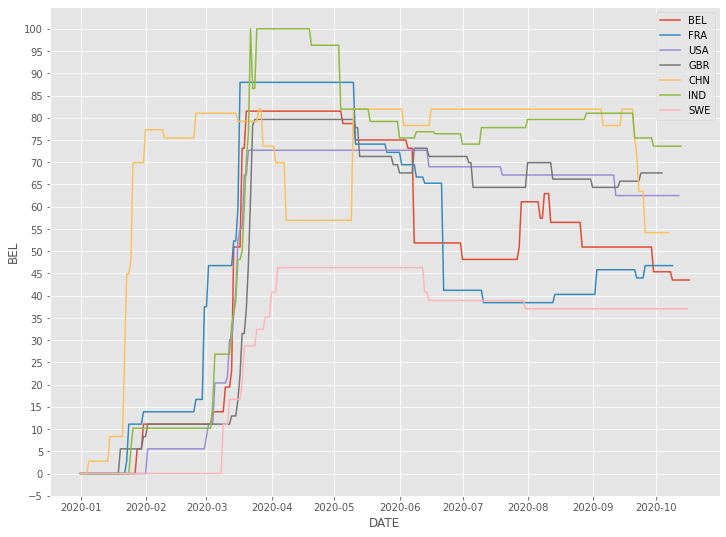

In [226]:
raw = raw.convert_dtypes()
raw.rename({"date": "DATE"}, inplace = True, axis = 1)
sti = pd.DataFrame({"DATE": raw.DATE.unique()})
iso_codes = ["BEL", "FRA", "USA", "GBR", "CHN", "IND", "SWE"]
for code in iso_codes:
    sti = merge_iso_code(sti, raw, code)
    sns.lineplot(data = sti, x = "DATE", y = code, label = code)
ax = plt.gca()
ax.set_ylim([-5, 105])
ax.set_yticks(range(-5, 105, 5))